# Contents

[KNN on train 1](#train1) <br>
[KNN on train 2](#train2) <br>
[KNN on train 3](#train3) <br>
[KNN on train 4](#train4) <br>
[Results analysis](#results)

### Import

In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import researchpy as rp
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from scipy.stats import skew 
from sklearn.model_selection import train_test_split
# # machine learning library
# from sklearn.linear_model import LinearRegression
# from sklearn import svm
# # data normalization from sklearn
# from sklearn.preprocessing import MinMaxScaler
# # data standardization from sklearn
# from sklearn.preprocessing import StandardScaler
# KNN regressor
from sklearn import neighbors
# calculate error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# computational time
import time

from math import sqrt

In [2]:
#importing the csv datasets
train1 = pd.read_csv('train_ONE.csv')
print('train1 shape:', train1.shape)

train2 = pd.read_csv('train_TWO.csv')
print('train2 shape:', train2.shape)

train3 = pd.read_csv('train_THREE.csv')
print('train3 shape:', train3.shape)

train4 = pd.read_csv('train_FOUR.csv')
print('train4 shape:', train4.shape)

train1 shape: (1370, 70)
train2 shape: (688, 75)
train3 shape: (688, 75)
train4 shape: (688, 75)


### Train 1 <a class="anchor" id="train1"></a>

In [14]:
print('KNN for optimization set 1:')

X1 = train1.copy()
X1.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y1 = train1['SalePrice'][:,None]

train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1,test_size=0.2)

R2_1 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X1, train_y1)  #fit the model
    pred = knn.predict(test_X1) #make prediction on test set
    error = r2_score(test_y1, pred) #calculate rmse
    R2_1.append(error) #store mse values
    print('R2 score for k = ' , K , 'is:', error)


KNN for optimization set 1:
R2 score for k =  1 is: 0.3867017571115752
R2 score for k =  2 is: 0.5386010925400537
R2 score for k =  3 is: 0.5759897227192694
R2 score for k =  4 is: 0.5970921833734939
R2 score for k =  5 is: 0.6048149207734108
R2 score for k =  6 is: 0.6098420721348656
R2 score for k =  7 is: 0.6382723031580504
R2 score for k =  8 is: 0.6428140168925283
R2 score for k =  9 is: 0.6500224425815722
R2 score for k =  10 is: 0.636094241708894
R2 score for k =  11 is: 0.6215599777174566
R2 score for k =  12 is: 0.6063687293435406
R2 score for k =  13 is: 0.6034219264217675
R2 score for k =  14 is: 0.6160306830564157
R2 score for k =  15 is: 0.6153990257273708
R2 score for k =  16 is: 0.615086995737798
R2 score for k =  17 is: 0.617523079753127
R2 score for k =  18 is: 0.6081985808440589
R2 score for k =  19 is: 0.6083820981168657
R2 score for k =  20 is: 0.6091871053782565


Text(0.5, 1.0, 'R2 test score:')

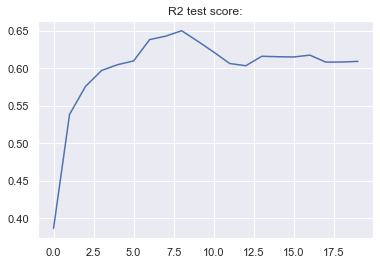

In [16]:
plt.plot(R2_1)
plt.title("R2 test score:")

In [30]:
print('Most optimal value of K is:', R2_1.index(max(R2_1))+1)
print('Best R2 score is:', max(R2_1))

Most optimal value of K is: 9
Best R2 score is: 0.6500224425815722


### Train 2 <a class="anchor" id="train2"></a>

In [18]:
print('KNN for optimization set 2:')

X2 = train2.copy()
X2.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y2 = train2['SalePrice'][:,None]

train_X2, test_X2, train_y2, test_y2 = train_test_split(X2,y2,test_size=0.2)

R2_2 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X2, train_y2)  #fit the model
    pred = knn.predict(test_X2) #make prediction on test set
    error = r2_score(test_y2, pred) #calculate rmse
    R2_2.append(error) #store mse values
    print('R2 score for k = ' , K , 'is:', error)


KNN for optimization set 2:
R2 score for k =  1 is: 0.6719202436097507
R2 score for k =  2 is: 0.7634955750666084
R2 score for k =  3 is: 0.7401926620209004
R2 score for k =  4 is: 0.7168704784965185
R2 score for k =  5 is: 0.716940515134316
R2 score for k =  6 is: 0.7104960714008746
R2 score for k =  7 is: 0.714281690585165
R2 score for k =  8 is: 0.703061417562962
R2 score for k =  9 is: 0.6959136812977487
R2 score for k =  10 is: 0.686480575814578
R2 score for k =  11 is: 0.6857438645795215
R2 score for k =  12 is: 0.682518921358976
R2 score for k =  13 is: 0.6790196781259474
R2 score for k =  14 is: 0.6744135503764546
R2 score for k =  15 is: 0.6635296753628749
R2 score for k =  16 is: 0.6497894952901736
R2 score for k =  17 is: 0.6390630899363408
R2 score for k =  18 is: 0.632898102543604
R2 score for k =  19 is: 0.6348075826901198
R2 score for k =  20 is: 0.6288511735058029


Text(0.5, 1.0, 'R2 test score:')

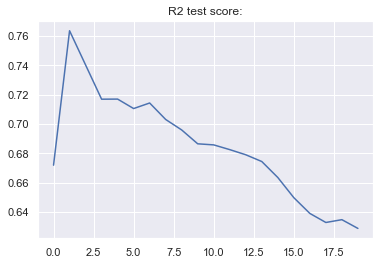

In [19]:
plt.plot(R2_2)
plt.title("R2 test score:")

In [31]:
print('Most optimal value of K is:', R2_2.index(max(R2_2))+1)
print('Best R2 score is:', max(R2_2))

Most optimal value of K is: 2
Best R2 score is: 0.7634955750666084


### Train 3 <a class="anchor" id="train3"></a>

In [20]:
print('KNN for optimization set 3:')

X3 = train3.copy()
X3.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y3 = train3['SalePrice'][:,None]

train_X3, test_X3, train_y3, test_y3 = train_test_split(X3,y3,test_size=0.2)

R2_3 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X3, train_y3)  #fit the model
    pred = knn.predict(test_X3) #make prediction on test set
    error = r2_score(test_y3, pred) #calculate rmse
    R2_3.append(error) #store mse values
    print('R2 score for k = ' , K , 'is:', error)


KNN for optimization set 3:
R2 score for k =  1 is: 0.7394961985235914
R2 score for k =  2 is: 0.7917175937422012
R2 score for k =  3 is: 0.8075473661487985
R2 score for k =  4 is: 0.8320211209259704
R2 score for k =  5 is: 0.83141159607425
R2 score for k =  6 is: 0.8264055013836817
R2 score for k =  7 is: 0.8223932258168603
R2 score for k =  8 is: 0.8234929976729369
R2 score for k =  9 is: 0.8226300879961655
R2 score for k =  10 is: 0.8184978750059821
R2 score for k =  11 is: 0.8106676479067678
R2 score for k =  12 is: 0.8037288043989045
R2 score for k =  13 is: 0.8007091115034488
R2 score for k =  14 is: 0.7946201259185381
R2 score for k =  15 is: 0.7953705015959226
R2 score for k =  16 is: 0.7912946266100183
R2 score for k =  17 is: 0.7867690861097268
R2 score for k =  18 is: 0.7820549975004607
R2 score for k =  19 is: 0.7811121484131192
R2 score for k =  20 is: 0.7824690060728988


Text(0.5, 1.0, 'R2 test score:')

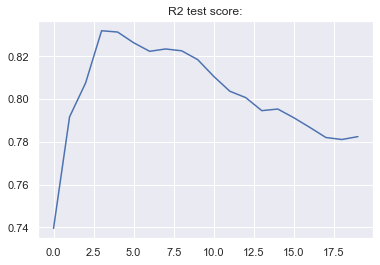

In [21]:
plt.plot(R2_3)
plt.title("R2 test score:")

In [32]:
print('Most optimal value of K is:', R2_3.index(max(R2_3))+1)
print('Best R2 score is:', max(R2_3))

Most optimal value of K is: 4
Best R2 score is: 0.8320211209259704


### Train 4 <a class="anchor" id="train4"></a>

In [22]:
print('KNN for optimization set 4:')

X4 = train4.copy()
X4.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y4 = train4['SalePrice'][:,None]

train_X4, test_X4, train_y4, test_y4 = train_test_split(X4,y4,test_size=0.2)

R2_4 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X4, train_y4)  #fit the model
    pred = knn.predict(test_X4) #make prediction on test set
    error = r2_score(test_y4, pred) #calculate rmse
    R2_4.append(error) #store mse values
    print('R2 score for k = ' , K , 'is:', error)


KNN for optimization set 4:
R2 score for k =  1 is: 0.7981711345820973
R2 score for k =  2 is: 0.797334025389884
R2 score for k =  3 is: 0.8146234226543394
R2 score for k =  4 is: 0.8193575079415494
R2 score for k =  5 is: 0.8257418478468619
R2 score for k =  6 is: 0.8327271902675628
R2 score for k =  7 is: 0.8305584198716163
R2 score for k =  8 is: 0.8328280252885937
R2 score for k =  9 is: 0.8271806993797015
R2 score for k =  10 is: 0.8253779629119595
R2 score for k =  11 is: 0.8230950709824871
R2 score for k =  12 is: 0.8149710918637798
R2 score for k =  13 is: 0.8157607859529805
R2 score for k =  14 is: 0.8150132325759254
R2 score for k =  15 is: 0.8088265992173053
R2 score for k =  16 is: 0.8081905624083657
R2 score for k =  17 is: 0.8069118160113083
R2 score for k =  18 is: 0.8044482284183048
R2 score for k =  19 is: 0.8025335383093464
R2 score for k =  20 is: 0.7986520334762407


Text(0.5, 1.0, 'R2 test score:')

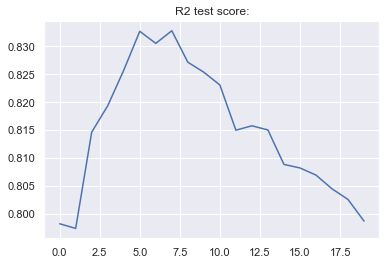

In [23]:
plt.plot(R2_4)
plt.title("R2 test score:")

In [33]:
print('Most optimal value of K is:', R2_4.index(max(R2_4))+1)
print('Best R2 score is:', max(R2_4))

Most optimal value of K is: 8
Best R2 score is: 0.8328280252885937


### Result analysis <a class="anchor" id="results"></a>

In [ ]:
maxscore_all= []

maxscore_all.append(max(R2_1))
maxscore_all.append(max(R2_2))
maxscore_all.append(max(R2_3))
maxscore_all.append(max(R2_4))

best_trainset = maxscore_all.index(max(maxscore_all)) + 1


In [29]:
R2_all = []
maxscore_all= []

R2_all.append(R2_1)
R2_all.append(R2_2)
R2_all.append(R2_3)
R2_all.append(R2_4)

for i in R2_all:
    maxscore_all.append(max(i))
    
best_trainset = maxscore_all.index(max(maxscore_all)) + 1
best_K = R2_all[best_trainset-1].index(max(R2_all[best_trainset-1])) + 1

print('Best result is given by optimization set', best_trainset, 'with K =', best_K)
print('R2 score is', R2_all[best_trainset-1][best_K-1])

Best result is given by optimization set 4 with K = 8
R2 score is 0.8328280252885937


In [35]:
maxscore_all

[0.6500224425815722,
 0.7634955750666084,
 0.8320211209259704,
 0.8328280252885937]